In [5]:
# Code written by Ji Zhang, last modified on 2024-11-08
# For manuscript "Thickness-dependent response of aerosol-jet-printed ultrathin high-aspect-ratio electrochemical microactuators"
# email: zhangji1623316718@gmail.com

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

def peakfinder(x,y,dataframe,height,distance):
  # Funcion adapted from Liam Ives
  xdata = np.array(dataframe[x])
  ydata = np.array(dataframe[y])
  # Find indices of peaks and troughs
  peak_indices, peak_properties = find_peaks(ydata, height=height,distance=distance)
  trough_indices, trough_properties = find_peaks(-ydata, height=-height,distance=distance)
  # Convert peak indices into time values
  peak_times = []
  for peak in peak_indices:
    peak_time = xdata[peak] # find peak time from index given in 'peaks'
    peak_times.append(peak_time)
  trough_times = []
  for trough in trough_indices:
    trough_time = xdata[trough] # find peak time from index given in 'peaks'
    trough_times.append(trough_time)
  print('Finding peak times...')
  print(peak_times)
  print('Finding trough times...')
  print(trough_times)
  return peak_indices, peak_times, trough_indices, trough_times, xdata, ydata

# Plot rc parameters adapted from Tom Wade
fig, ax = plt.subplots() # Need to open a 'plot' so that pcParams actually works
plt.close()
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'

plt.rcParams.update({
    'font.size': 14,          # controls default text sizes
    'axes.labelsize': 14,     # fontsize of the x and y labels
    'axes.titlesize': 14,     # fontsize of the axes title
    'xtick.labelsize': 14,    # fontsize of the tick labels
    'ytick.labelsize': 14,    # fontsize of the tick labels
    'legend.fontsize': 14,    # fontsize of the legend
    'figure.titlesize': 16,   # fontsize of the figure title
})

path = os.getcwd()
print(path)
txt_files = [f for f in os.listdir(os.path.join(path, "IV")) if f.endswith('.txt')]
print(txt_files)
csv_files = [f for f in os.listdir(os.path.join(path, "def")) if f.endswith('.csv')]
print(csv_files)

c:\Users\jz495\OneDrive - University of Cambridge\Papers\Soft Matter\Zhang_et_al_data\Actuation\AC durability
['6924 4LPP 0p5Hz 0p4Vpp.txt', '6925 4LPP 0p5Hz 0p8Vpp.txt', '6926 4LPP 0p5Hz 1p2Vpp.txt', '6927 4LPP 0p5Hz 1p6Vpp.txt', '6928 4LPP 0p5Hz 2Vpp unrecorded.txt', '6930 4LPP 0p5Hz 2VPP.txt', '6931 4LPP 0p5Hz 2p4Vpp.txt', '6932 4LPP 0p5Hz 2p8Vpp.txt', '6933 4LPP 0p5Hz 3p2Vpp.txt', '6934 4LPP 0p5Hz 3p6Vpp.txt', '6935 4LPP 0p5Hz 4Vpp.txt', '6936 4LPP 0p5Hz 4p4Vpp.txt', '6937 4LPP 0p5Hz 4p8Vpp.txt', '6938 4LPP 0p5Hz 4p4Vpp after rxn.txt', '6939 4LPP 0p5Hz 4p8Vpp again.txt']
['6924.csv', '6925.csv', '6926.csv', '6927.csv', '6930.csv', '6931.csv', '6932.csv', '6933.csv', '6934.csv', '6935.csv', '6936.csv', '6937.csv', '6938.csv', '6939.csv']


In [6]:
def average(lst):
  return sum(lst)/len(lst)

def sd(lst):
  n = len(lst)
  m = sum(lst)/n
  var = sum((np.array(lst)-m)**2)/n
  return np.sqrt(var)

def sds(lst):
  n = len(lst)
  m = sum(lst)/n
  var = sum((np.array(lst)-m)**2)/(n-1)
  return np.sqrt(var)

def extract_columns(file_path):
    # Read the .txt file, assuming it is tab-separated
    df = pd.read_csv(file_path, sep='\t', header=None)
    # Extract the first, third, and fourth columns
    extracted_df = df.iloc[:, [0, 2, 3]]
    # Rename the columns
    extracted_df.columns = ['ti', 'V', 'I'] #mA
    return extracted_df

def extract_and_process_csv(file_path):
    # Read the CSV file with headers time, x/px, y/px
    df = pd.read_csv(file_path)
    extracted_df = df.iloc[:, [0, 1, 2]]
    # Rename the columns
    extracted_df.columns = ['td', 'x/px', 'y/px']
    # Calculate the theta/rad column
    extracted_df['d'] = np.arctan2(extracted_df['y/px'], extracted_df['x/px'])
    return extracted_df

In [7]:
list = ['6924', '6925', '6926', '6927', '6930', '6931', '6932', '6933', '6934', '6935', '6936', '6937']
list.reverse()
volt = [round(0.4 + 0.4 * i, 1) for i in range(12)]
volt.reverse()
print(volt)

[4.8, 4.4, 4.0, 3.6, 3.2, 2.8, 2.4, 2.0, 1.6, 1.2, 0.8, 0.4]


Finding peak times...
[0.1, 2.28, 4.12, 6.14, 8.14, 10.14, 12.14, 14.14, 16.16, 18.14, 20.16, 22.16, 24.16, 26.16, 28.18, 30.18, 32.2, 34.18, 36.2, 38.18, 40.18, 42.18, 44.18, 46.18, 48.18, 50.16, 52.16, 54.16, 56.16, 58.16, 60.16, 62.16, 64.16, 66.16, 68.16, 70.16, 72.16, 74.16, 76.16, 78.16, 80.16, 82.16, 84.16, 86.16, 88.16, 90.16, 92.16, 94.14, 96.16, 98.16, 100.14, 102.14, 104.14, 106.14, 108.14, 110.14, 112.14, 114.14, 116.14, 118.14, 120.14, 122.14, 124.14, 126.14, 128.14, 130.14, 132.14, 134.14, 136.14, 138.14, 140.14, 142.14, 144.14, 146.14, 148.14, 150.12, 152.14, 154.12, 156.14, 158.12, 160.12, 162.12, 164.12, 166.12, 168.12, 170.12, 172.12, 174.12, 176.12, 178.12, 180.12, 182.12, 184.12, 186.12, 188.12, 190.12, 192.12, 194.12, 196.12, 198.12, 200.12, 202.12, 204.12, 206.12, 208.12, 210.12, 212.12, 214.12, 216.12, 218.12, 220.12, 222.12, 224.12, 226.12, 228.12, 230.12, 232.12, 234.1, 236.1, 238.12, 240.12, 242.12, 244.12, 246.12, 248.12, 250.12, 252.12, 254.12, 256.1, 258.1,

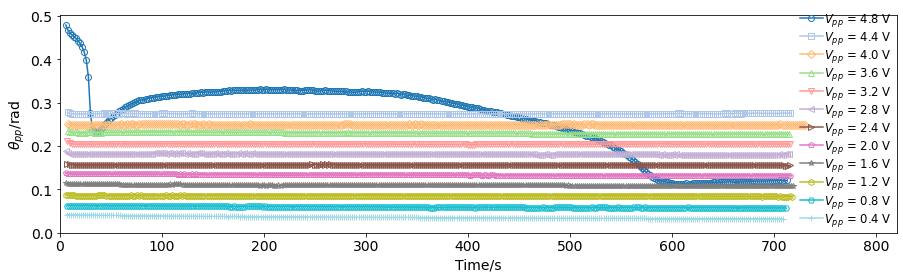

In [8]:
# find peak to peak deflection against time for csv files in list
fig, ax = plt.subplots()
fig.set_figwidth(15)

colors = plt.cm.tab20(np.linspace(0, 1, len(list)))
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'H', '+']

for idx, name in enumerate(list):
    Vpp = volt[idx]
    csv_file = [f for f in csv_files if f.startswith(name)][0]
    df_def = extract_and_process_csv(os.path.join(path, "def", csv_file))
    tds = df_def['td'].to_numpy()
    ds = df_def['d'].to_numpy()

    # find peaks in ds, frequency is 0.5Hz
    peak_indices_d, peak_times_d, trough_indices_d, trough_times_d, xdata_d, ydata_d = peakfinder('td', 'd', df_def, 0, 90)
    
    # find peak to peak displacement
    peaktopeak_ds = []
    for i in range(len(peak_indices_d)-1):
        peaktopeak_ds.append(max(ds[peak_indices_d[i]:peak_indices_d[i+1]]) - min(ds[peak_indices_d[i]:peak_indices_d[i+1]]))
    
    # plot peak to peak displacement against time
    ax.plot(peak_times_d[3:-6], peaktopeak_ds[3:-5], marker=markers[idx % len(markers)], linestyle='-', color=colors[idx], label=f'$V_{{pp}}$ = {Vpp} V', markerfacecolor='none')
    ax.set_xlabel('Time/s')
    ax.set_ylabel(r'$\theta_{pp}$/rad', color='black')

ax.set_xlim(0,820)
ax.set_ylim(bottom=0)
plt.legend(fontsize='small', ncol=1, frameon=False, borderaxespad=0, labelspacing=0.1, handletextpad=0.1, columnspacing=0.5, loc='lower right')
# fig.savefig("peak_to_peak_deflection.svg", format='svg')
plt.show()